# Problem Statement

## Predicting Survival in the Titanic Data Set

<p>I will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.</p>

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb #Visualizing statistical relationships and Relating variables with scatter plots
import matplotlib.pyplot as plt  #matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB
import sklearn #This is a Python module for machine learning built on top of SciP
from pandas import Series, DataFrame #imports Series and DataFrame
from pylab import rcParams 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression #importing Logistic Regression as Machine Learning classification algorithm
from sklearn.cross_validation import train_test_split # importing train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline
import pydotplus #provides a Python Interface to Graphviz's Dot language
from IPython.display import Image, display
from matplotlib.colors import ListedColormap #cstomizing matplotlib

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Pre-Processing

In [2]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url) #Reading "Titanic" CSV file into DataFrame

#### Using Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived

## Data Exploration/Analysis

In [3]:
titanic.head() #Returns the first 5 rows of titanic dataframe 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns #Columns of titanic dataframe

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.info() #Prints information about titanic DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.describe() #The summary statistics of the titanic dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.shape #Return a tuple representing the dimensionality of titanic DataFrame.

(891, 12)

In [8]:
titanic.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [9]:
#seeing missing data
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


<p>There are missing data in cabin, Age and Embarked coulmns.</p>

## Data Visualization

### Age and Sex:

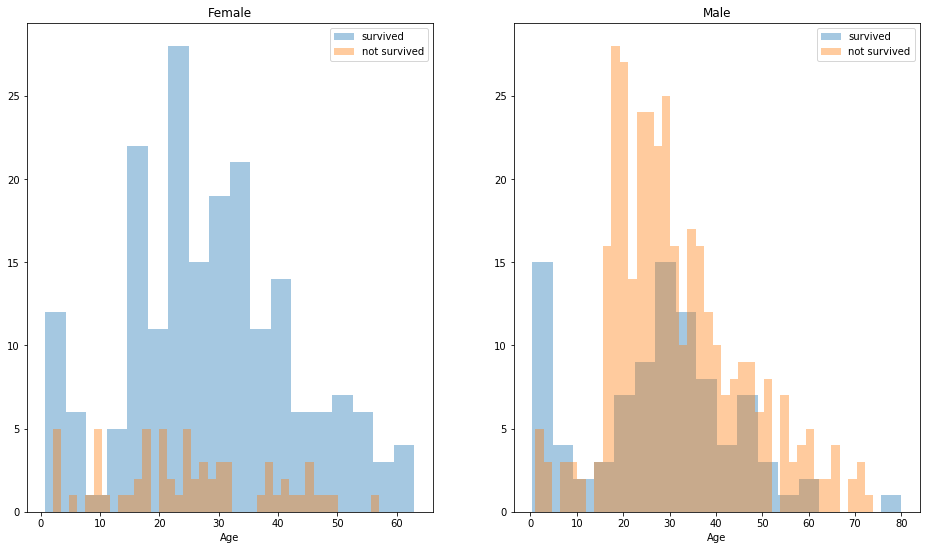

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 9)) #setting up the plot
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sb.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False) #for x-axis
ax = sb.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False) #for yaxis
ax.legend() #setting the legend
ax.set_title('Female') #setting the title
ax = sb.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False) #for y-axis
ax = sb.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False) #for y-axis
ax.legend()
_ = ax.set_title('Male')

<p>We can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.</p>

### Embarked, Pclass and Sex:

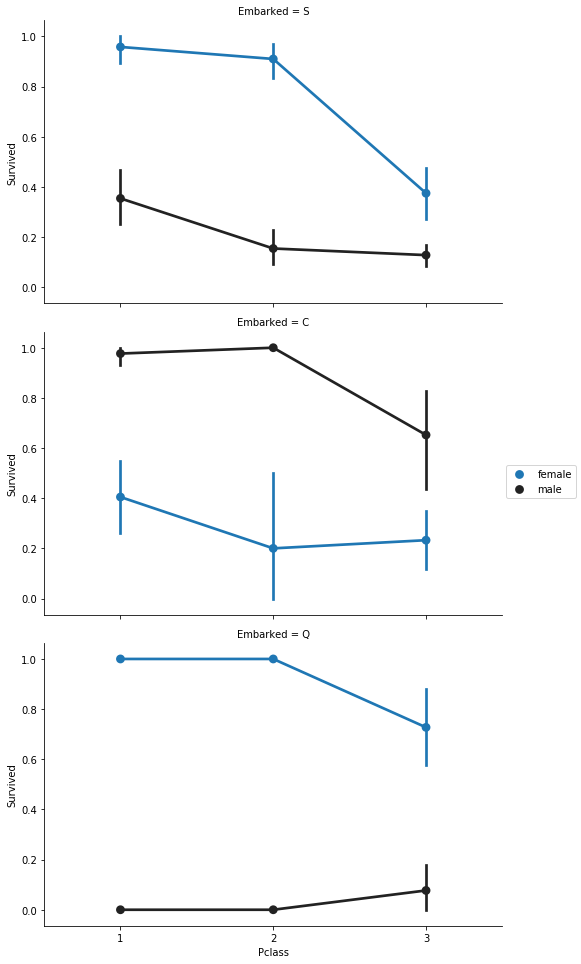

In [11]:
FacetGrid = sb.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend() #adding legend

<p>Embarked seems to be correlated with survival, depending on the gender. </p>

<p>Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.</p>

### Pclass:

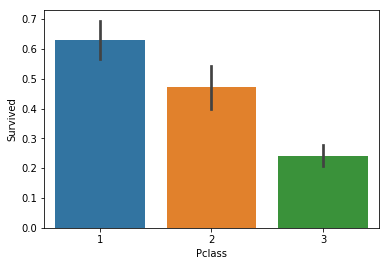

In [12]:
sb.barplot(x='Pclass', y='Survived', data=titanic) #plotting a bar-graph for survived passenger as per "Passenger Class i.e Pclass"

<p>Pclass is contributing to a persons chance of survival, especially if this person is in class 1. </p>

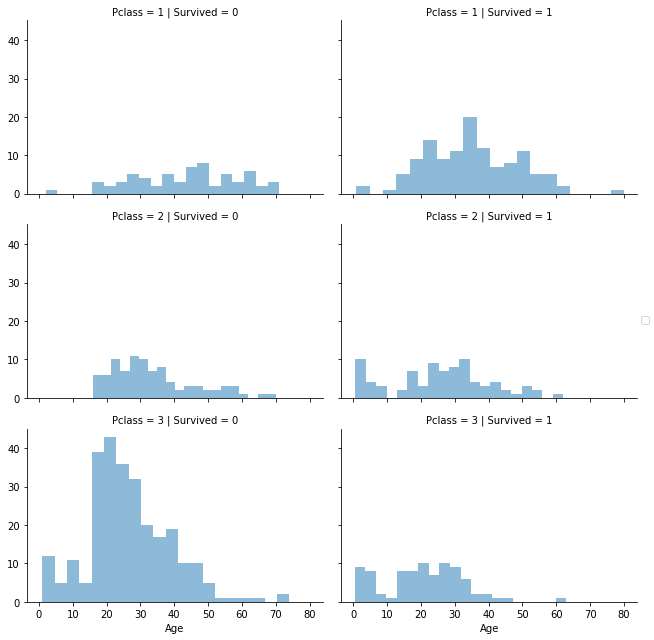

In [13]:
grid = sb.FacetGrid(titanic, col='Survived', row='Pclass', size=3, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20) #setting the significance level to 0.5
grid.add_legend()

<p>There is a high probability that a person in pclass 3 will not survive. </p>

### SibSp and Parch

In [14]:
titanic_temp = titanic
titanic_temp['relatives'] = titanic_temp['SibSp'] + titanic_temp['Parch'] #calculating relatives
titanic_temp.loc[titanic_temp['relatives'] > 0, 'not_alone'] = 0  #if relatives count is > 0 , set not_alone = 1
titanic_temp.loc[titanic_temp['relatives'] == 0, 'not_alone'] = 1 #else relatives count==0 , set not_alone = 0
titanic_temp['not_alone'] = titanic_temp['not_alone'].astype(int)
titanic_temp['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

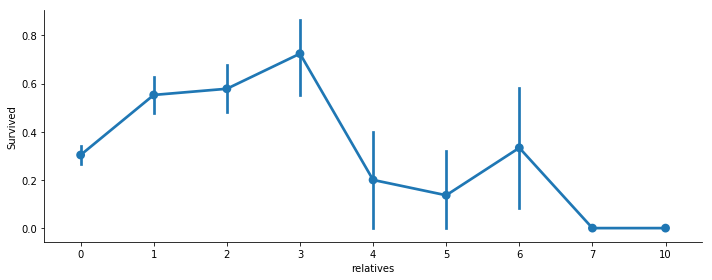

In [15]:
axes = sb.factorplot('relatives','Survived', data=titanic_temp, aspect = 2.5)

## Data Preprocessing

### Missing Data: Cabin
<p>Observing the dataframe: A cabin number looks like ‘C123’ and the letter refers to the deck.</p>
<p>I am going to extract observed cabin feature and create a new feature, that contains a persons deck. Afterwords I will convert the feature into a numeric variable. The missing values will be converted to zero. </p>

In [16]:
titanic_new = titanic

import re #importing regular expression package
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic_new['Cabin'] = titanic_new['Cabin'].fillna("U0")
titanic_new['Deck'] = titanic_new['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) #serching for missing value
titanic_new['Deck'] = titanic_new['Deck'].map(deck)
titanic_new['Deck'] = titanic_new['Deck'].fillna(0) #replacing missing value with 0
titanic_new['Deck'] = titanic_new['Deck'].astype(int)

#I will now drop the cabin feature
titanic_new = titanic_new.drop(['Cabin'], axis=1)

titanic_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,1,8
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0,8


### Missing Data: Age

<p> I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null. <p>

In [17]:
mean = titanic_new["Age"].mean()
std = titanic_new["Age"].std()
is_null = titanic_new["Age"].isnull().sum()

#Computing random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

#Filling NaN values in Age column with random values generated
age_slice = titanic_new["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic_new["Age"] = age_slice
titanic_new["Age"] = titanic_new["Age"].astype(int)

In [18]:
titanic_new["Age"].isnull().sum() #Check for any null in the Age column.

0

### Missing Data: Embarked

<p>I will fill Embarked misssing values with the most common one. </p>

In [19]:
titanic_new['Embarked'].describe()  #The summary statistics of the Embarked column

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
common_value = 'S' #By Observing the Embarked column
titanic_new['Embarked'] = titanic_new['Embarked'].fillna(common_value)

In [21]:
titanic_new.info() #Prints information about titanic_new DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 87.1+ KB


In [22]:
titanic_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

### Converting Features: Sex

<p> Converting ‘Sex’ feature into numeric. </p>

In [23]:
genders = {"male": 1, "female": 0}
titanic_new['Sex'] = titanic_new['Sex'].map(genders)

### Converting Features: Fare

<p>Converting “Fare” from float to int64.</p>

In [24]:
titanic_new['Fare'] = titanic_new['Fare'].fillna(0)
titanic_new['Fare'] = titanic_new['Fare'].astype(int)

In [25]:
titanic_new.info() #Prints information about titanic_new DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int32
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: int32(4), int64(7), object(3)
memory usage: 83.6+ KB


## titanic and titanic_new dataframe

In [26]:
titanic.head() #Returns the first 5 rows of the titanic dataframe 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8


In [27]:
titanic_new.head() #Returns the first 5 rows of the titanic_new dataframe 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,S,0,1,8


In [28]:
titanic.describe() #The summary statistics of the titanic dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone,Deck
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694,6.936027
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615,2.074282
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,8.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,8.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,8.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,8.000000


In [29]:
titanic_new.describe() #The summary statistics of the titanic_new dataframe

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.722783,0.523008,0.381594,31.785634,0.904602,0.602694,6.936027
std,257.353842,0.486592,0.836071,0.477990,13.536822,1.102743,0.806057,49.703730,1.613459,0.489615,2.074282
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.000000,0.000000,0.000000,8.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.000000,0.000000,1.000000,8.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,8.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,10.000000,1.000000,8.000000


In [30]:
titanic.info() #Prints information about titanic DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 97.5+ KB


In [31]:
titanic_new.info() #Prints information about titanic_new DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int32
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: int32(4), int64(7), object(3)
memory usage: 83.6+ KB


## Train, Test & Split

In [32]:
#Selecting features
X = titanic_new[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']] 
Y = titanic_new['Survived']

In [33]:
#Spliting data randomly into 70% training and 30% test
from sklearn import tree, metrics, model_selection, preprocessing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape) #Training data shape (predictor values) : 70%
print(X_test.shape) #Test data shape (predictor values) : 30%
print(Y_train.shape) #Training data shape (target values) : 70%
print(Y_test.shape) #Test data shape (target values) : 30%

(623, 6)
(268, 6)
(623,)
(268,)


## Creating and Training the Model

In [34]:
#Training the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Predicting Survived using Test Data

In [35]:
#Using the model to make predictions with the test data
Y_pred = dtree.predict(X_test)

In [36]:
Y_pred.shape #Return a tuple representing the dimensionality of Y_pred.

(268,)

In [37]:
Y_pred 

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

## Visualization

### Visualize how the tree splits using GraphViz

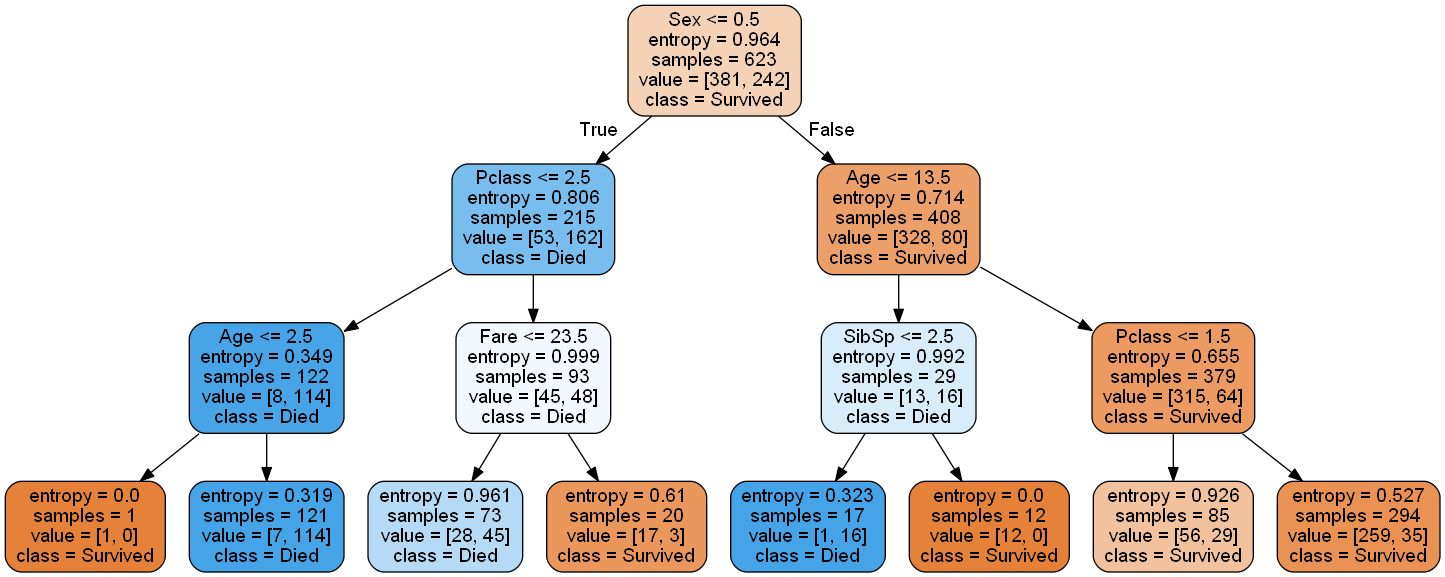

In [38]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],  
                                class_names=['Survived','Died'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

## Evaluate the model's performance

### How did created model perform?

In [39]:
#How did created model perform?
count_misclassified = (Y_test != Y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 48
Accuracy: 0.82


In [40]:
### Holdout Validation


In [41]:
from sklearn.cross_validation import KFold

cv = KFold(n=len(X), #Number of elements
           n_folds=10, #Desired number of cv folds
           random_state=12) 

fold_accuracy = []

for train_fold, valid_fold in cv:
    train = X.loc[train_fold] #Extract train data with cv indices
    valid = X.loc[valid_fold] #Extract valid data with cv indices
    
    train_y = Y.loc[train_fold]
    valid_y = Y.loc[valid_fold]
    
    model = dtree.fit(X = train, y = train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.8222222222222222, 0.8539325842696629, 0.7865168539325843, 0.8426966292134831, 0.7865168539325843, 0.8089887640449438, 0.7752808988764045, 0.7752808988764045, 0.8876404494382022, 0.8089887640449438] 

Average accuracy:  0.8148064918851438


### Cross Validation

In [42]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= dtree, #Model to test
                X = X,  
                y = Y,                #Target variable
                scoring = "accuracy", #Scoring metric    
                cv=10)                #Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.82222222 0.82222222 0.78651685 0.84269663 0.82022472 0.78651685
 0.79775281 0.78651685 0.85393258 0.80681818]
Average accuracy:  0.8125419929633415
